# Práctica 9: Modelados de Datos

En este notebook resolveremos el noveno práctico enfocado en el modelado de datos.

El enunciado solicita que:

> 1. Genere un conjunto de 1000 datos aleatorios en el intervalo xε(0,1). Para ese conjunto
> obtenga la correspondiente función lineal y=0.7*x-0.35.
> 2. Genere un nuevo conjunto de 1000 datos aleatorios xnew y calcule los errores
> dy=0.1*arccos(1-2*xnew)-0.1*π/2. → (x,y’=y+dy)
> 3. Realice un ajuste lineal de sus datos (x, y’=y+dy) con la rutina “fit”

Para luego presentar:

> 1. El programa for
> 2. Los valores obtenidos de a y b, y sus errores estimados (chi2 ~ 998: N-2) .
> 3. Graficar en el plano x-y: los 1000 datos y el ajuste que obtiene

Importamos librerías necesarias. Harmos uso de la función `linregress` de `scipy.stats` para realizar el ajuste lineal de los datos.

In [1]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

Generamos datos sintéticos de la siguiente forma:

$$ y(x) = a x + b + \epsilon $$

Con $a$ = 0.7 y $b$ = -0.35, para 1000 valores aleatorios de $x \in (0, 1)$.

Los errores $\epsilon$ son generados aleatoriamentes a través de la siguiente función:

$$ \epsilon = \frac{1}{10} \left[ \arccos(1 - 2 \mu) - \frac{\pi}{2} \right] $$

donde $\mu$ es una variable aleatoria distribuida uniformemente entre 0 y 1.

In [2]:
np.random.seed(0)

n_data = 1000
x = np.random.rand(n_data)

errors = 0.1 * np.arccos(1  - 2 * np.random.rand(n_data)) - 0.1 * np.pi / 2

slope = 0.7
intercept = -0.35
y = slope * x + intercept + errors

Graficamos los datos sintéticos

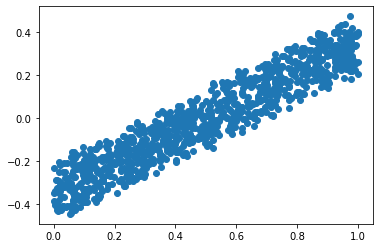

In [3]:
plt.scatter(x, y)
plt.show()

## Ajuste de datos

Procedemos a realizar un ajuste lineal de los datos sintéticos:

In [4]:
reg = linregress(x, y)
reg

LinregressResult(slope=0.700836444588099, intercept=-0.3477069488798456, rvalue=0.9438021302155016, pvalue=0.0, stderr=0.007768844120764724)

In [5]:
print("Pendiente:", reg.slope)
print("Término independiente:", reg.intercept)

Pendiente: 0.700836444588099
Término independiente: -0.3477069488798456


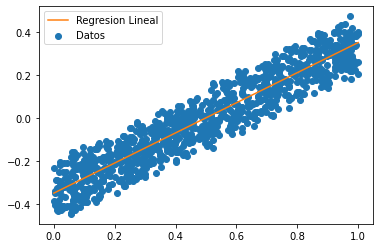

In [6]:
x_line = np.array([0, 1])

plt.scatter(x, y, label="Datos")
plt.plot(
    x_line, reg.slope * x_line + reg.intercept, c="C1", label="Regresion Lineal"
)
plt.legend()
plt.show()

## Bondad del ajuste

Estimemos la calidad del ajuste lineal que hemos realizado.

### Coeficiente de determinación

Una posibilidad es utilizar el coeficiente de determinacion $R^2$:

In [7]:
print("Coeficiente de determinación:", reg.rvalue ** 2)

Coeficiente de determinación: 0.8907624609993187


Esto indica que el 89% de la variancia de los datos puede ser modelada a través del ajuste lineal obtenido.

### Chi-cuadrado

Otra posibilidad es calcular $\chi^2$:

In [8]:
# Estimamos el error de los datos sintéticos como el máximo valor de los errores
sigma = np.abs(errors).max()
print("sigma:", sigma)

sigma: 0.15324615519423107


Calculamos los valores predichos por el modelo en las absicas de los datos

In [9]:
y_predicted = reg.slope * x + reg.intercept

Calculamos $\chi^2$ como:
    
$$ \chi^2 = \sum\limits_{i=1}^N \left( \frac{y_i - y(x_i)}{\sigma_i} \right)^2 $$

In [10]:
chi_sq = np.sum(((y - y_predicted) / sigma)**2)
print("Chi^2:", chi_sq)

Chi^2: 216.59675171716196
